In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Vector Functions.

A vector function $f: \rm I\!R^{2} \to \rm I\!R^{2}$ is a linear transformation if *for all* scalars $\alpha$ and *for all* vectors $x$, $y$ $\epsilon$   $\rm I\!R^{n}$ it is the case that:  

$f(\alpha * x) = \alpha * f(x)$ and  
$f(x + y) = f(x) + f(y)$  

In the example below it should be obvious that scaling vector $v$ (from orange to blue) and *then* rotating it by 90 degrees (blue to green) is the same as performing the rotation first (orange to red) and *then* scaling it (red to green).

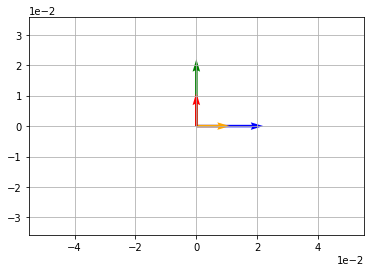

In [2]:
v = np.array([1,0]) 
t = 2 * v
u = np.array([0,1])
w = 2 * u

# Plot v and t
vecs = np.array([t, v, w, u])
origin = [0], [0]

plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange', 'green', 'red'], scale=10)
plt.show()

## 2. From Linear Transformation to Matrix-Vector Multiplication.

A matrix is a convenient way of representing a linear transformation.  

Given k vectors $v$ and k scalars $\alpha$, we can take a linear combination of the vectors and then apply a linear transformation $L$ or we can apply the linear transformation $L$ first to the vectors and then take the linear combination of the results.  

\begin{equation*}
L\left( \sum_{j=0}^{k-1} \alpha_j v_j \right) =  \sum_{j=0}^{k-1} \alpha_j L(v_j)
\end{equation*}

Any vector $x$ $\epsilon$   $\rm I\!R^{n}$ can be written as a linear combination of the unit basis vectors that uses the coefficients that are the components of vector $x$. In other words, $L$ is completely described by how it transforms the unit basis vectors.

The function below exemplifies how a vector is transformed based on the transformations known to happen with the unit basis vectors.  

In effect, the components of the vector to be transformed (2,3) are multiplied with the linearly transformed unit basis vectors, (3,5) and (2,-1), respectively.

In [3]:
def linear_transform(vec_transforms, target):
    """
    vec_transforms: a list of tuple where each tuple consists of a unit basis vector and the vector resulting
    form a linear transformation
    target: vector to be transformed
    
    Returns: linearly transformed vector
    """
    res = (target[0] * vec_transforms[0][1] + target[1] * vec_transforms[1][1])
    return res

vec_transforms = [np.array([[1,0], [3,5]]), np.array([[0,1], [2,-1]])]
target = np.array([2,3])
print(linear_transform(vec_transforms, target))

[12  7]


We can combine the linear transformations of the basis unit vectors in a matrix and then multiply the matrix with the vector to be transformed. This yields the same result. As such, a matrix linearly transforms a vector.

In [4]:
# Example 1
m = np.array([[3,2],
              [5,-1]])
v = np.array([2,3])
print('Matrix vector multiplication result:', np.dot(m, v))

Matrix vector multiplication result: [12  7]


In [5]:
# Example 2
m = np.array([[-1,0,2],
              [-3,1,-1],
              [-2,-1,2]])
v = np.array([1,0,0])
print('Matrix vector multiplication result:', np.dot(m, v)) # the first column of the matrix !

Matrix vector multiplication result: [-1 -3 -2]


In [6]:
# Example 2
m = np.array([[-1,0,2],
              [-3,1,-1],
              [-2,-1,2]])
v = np.array([0,0,1])
print('Matrix vector multiplication result:', np.dot(m, v)) # the last column of the matrix !

Matrix vector multiplication result: [ 2 -1  2]


In [7]:
# Example 3
m = np.array([[-1,0,2],
              [-3,1,-1],
              [-2,-1,2]])

v0 = np.array([0,
               0,
               1])

v1 = np.array([1,
               0,
               0])

print('Result of vector @ matrix @ vector:', np.dot(v0, np.dot(m,v1))) # the (2,0) element of the matrix

Result of vector @ matrix @ vector: -2


In [8]:
# Example 4
m = np.array([[-1,0,2],
              [-3,1,-1],
              [-2,-1,2]])

v0 = np.array([0,
               1,
               0])

v1 = np.array([1,
               0,
               0])

print('Result of vector @ matrix @ vector:', np.dot(v0, np.dot(m,v1))) # the (1,0) element of the matrix

Result of vector @ matrix @ vector: -3


In [9]:
# Example 5
m = np.array([[2,-1],
              [1,0],
              [-2,3]])

v0 = np.array([0,
               1])

v1 = np.array([1,
               0])

print('Result:', np.dot(m, v0) + np.dot(m, v1))

Result: [1 1 1]


## 3. Rotations and Reflections.

### 3a. Rotations.

The linear transformation that rotates a vector $x$ $\epsilon$   $\rm I\!R^{2}$ through an angle $\theta$ is represented by the 2 x 2 matrix:  

\begin{equation*}
\begin{vmatrix}
\cos\theta & -sin\theta  \\
\sin\theta &  cos\theta  
\end{vmatrix}
\end{equation*}

In [10]:
# Example
def rotate_vector(vec, angle):
    theta = np.radians(angle)
    m = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    rot_vec = np.dot(m, vec)
    return rot_vec

vec = np.array([1,0])
angle = 90 # degrees
print('Rotated vector:', np.round(rotate_vector(vec, angle)))

Rotated vector: [ 0.  1.]


Note that the dot product tells us something about the angle between the vectors.

In [11]:
print("The dot product of two orthogonal vectors is:", np.array([1,0]).dot(np.array([0,1])))
print("The dot product of two vectors with the same directions is:", np.array([1,0]).dot(np.array([1,0])))
print("The dot product of two vectors with opposite directions is:", np.array([1,0]).dot(np.array([-1,0])))

The dot product of two orthogonal vectors is: 0
The dot product of two vectors with the same directions is: 1
The dot product of two vectors with opposite directions is: -1


Given two vectors **r** and **s** separated by an angle theta, they form a triangle with a third (r - s) side **q** = **r** - **s**.
The dot product of this vector **q** with itself is given by:  

r$**$2 - s$**$2 - 2rscos(theta)  

From this it follows that r.dot(s) = |r|$*$|s|$*$cos(theta) where |x| denotes the size of vector x.  
Therefore the dot product between two vectors equals the cosine of the angle between the two vectors multiplied by their magnitudes which, in case of the basis (or unit) vectors is 1.

The dot product is: 2
The length of r is: 2.2360679775
The length of s is: 2.0
The angle between r and is: 1.10714871779 radians.


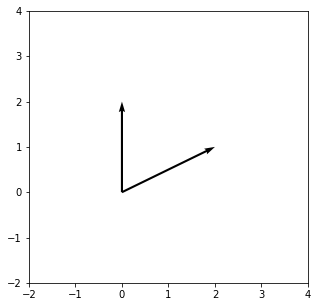

In [12]:
r = np.array([2, 1])
s = np.array([0, 2])
print("The dot product is:", r.dot(s))

r_length = np.sqrt(r[0]**2 + r[1]**2)
s_length = np.sqrt(s[0]**2 + s[1]**2)
print("The length of r is:", r_length)
print("The length of s is:", s_length)

r_s_angle = np.arccos(r.dot(s)/(r_length * s_length))
print("The angle between r and is:", r_s_angle, "radians.")

#print(np.rad2deg(r_s_angle))
vectors = np.array([[0, 0, r[0], r[1]], [0, 0, s[0], s[1]]])
X, Y, U, V = zip(*vectors)

plt.figure(figsize=(5,5))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-2, 4])
ax.set_ylim([-2, 4])
plt.draw()
plt.show()

### 3b. Reflections.

In [13]:
r = np.array([1, 0]); s = np.array([0, 2])
print("The original basis vectors:", r, "and", s)

mtx = np.array([[-1, 0], [0, 1]])
print("Mirrored on the y-axis:", mtx @ r, mtx @ s)

mtx = np.array([[-1, 0], [0, -1]])
print("Inversion:", mtx @ r, mtx @ s)

mtx = np.array([[0, 1], [1, 0]])
print("Mirrored on y=x:", mtx @ r, mtx @ s)

mtx = np.array([[0, -1], [-1, 0]])
print("Mirrored on y=-x:", mtx @ r, mtx @ s)

The original basis vectors: [1 0] and [0 2]
Mirrored on the y-axis: [-1  0] [0 2]
Inversion: [-1  0] [ 0 -2]
Mirrored on y=x: [0 1] [2 0]
Mirrored on y=-x: [ 0 -1] [-2  0]
